In [12]:
import os

In [13]:
experiment_path = './outputs/bioblobs_runtime_poster/ec/random'
k_hop_list = [1,2,3]
num_blob_list = [5,10,15,20,25]

In [14]:
import json
import pandas as pd
import re
from pathlib import Path

# Collect all timing data
timing_data = []

# Iterate through all experiment directories
experiment_dir = Path(experiment_path)
for exp_dir in experiment_dir.iterdir():
    if not exp_dir.is_dir():
        continue
    
    # Parse directory name: num_blob{num}_khop{k}
    match = re.match(r'num_blob(\d+)_khop(\d+)', exp_dir.name)
    if not match:
        continue
    
    num_blob = int(match.group(1))
    k_hop = int(match.group(2))
    
    # Read timing JSON file
    timing_file = exp_dir / 'stage0' / 'stage0_timing.json'
    if not timing_file.exists():
        print(f"Warning: {timing_file} not found")
        continue
    
    with open(timing_file, 'r') as f:
        timing_json = json.load(f)
    
    timing_data.append({
        'num_blob': num_blob,
        'k_hop': k_hop,
        'avg_train_time_seconds': timing_json['avg_train_time_seconds']
    })

# Create dataframe
df = pd.DataFrame(timing_data)

# Sort by k_hop first, then num_blob
df = df.sort_values(['k_hop', 'num_blob'])

print("Raw data:")
print(df)
print("\n" + "="*50 + "\n")


Raw data:
    num_blob  k_hop  avg_train_time_seconds
0          5      1                  0.9062
3         10      1                  1.2710
6         15      1                  1.5711
9         20      1                  1.8546
12        25      1                  2.1465
1          5      2                  1.3860
4         10      2                  2.1070
7         15      2                  2.5440
10        20      2                  2.7663
13        25      2                  3.0031
2          5      3                  1.7310
5         10      3                  2.4006
8         15      3                  2.7581
11        20      3                  2.9410
14        25      3                  3.1046




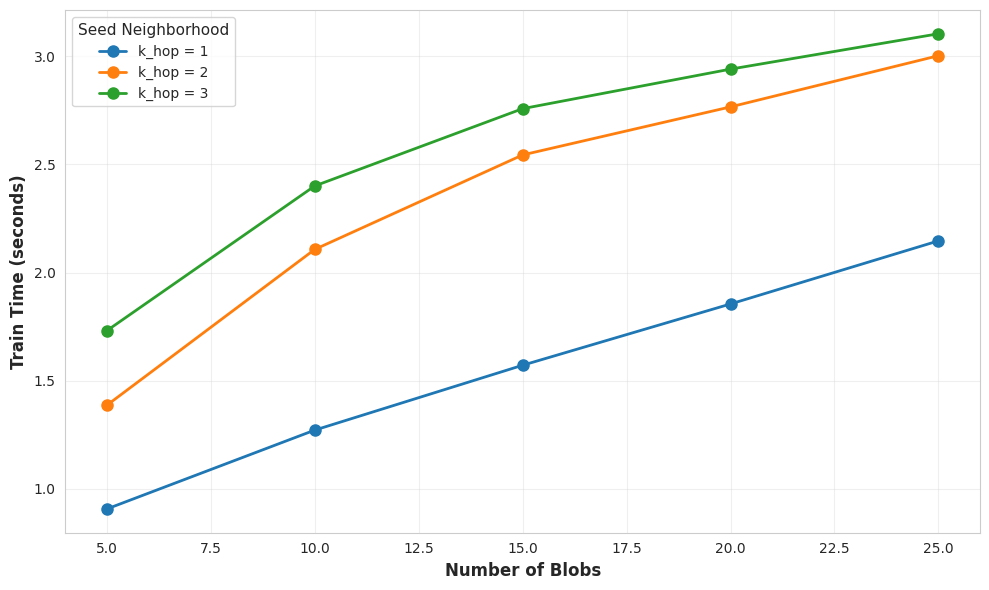

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Plot lines for each k_hop
for k_hop in sorted(df['k_hop'].unique()):
    k_hop_data = df[df['k_hop'] == k_hop].sort_values('num_blob')
    plt.plot(
        k_hop_data['num_blob'], 
        k_hop_data['avg_train_time_seconds'],
        marker='o',
        linewidth=2,
        markersize=8,
        label=f'k_hop = {k_hop}'
    )

plt.xlabel('Number of Blobs', fontsize=12, fontweight='bold')
plt.ylabel('Train Time (seconds)', fontsize=12, fontweight='bold')
# plt.title('Train Time vs Number of Blobs', fontsize=14, fontweight='bold')
plt.legend(title='Seed Neighborhood', fontsize=10, title_fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()


In [16]:
# Create pivot table: k_hop as rows, num_blob as columns
df_pivot = df.pivot_table(
    index='k_hop',
    columns='num_blob',
    values='avg_train_time_seconds',
    aggfunc='first'
)

# Sort columns by num_blob
df_pivot = df_pivot.sort_index(axis=1)

# Sort rows by k_hop
df_pivot = df_pivot.sort_index(axis=0)

# Format for better display
df_pivot.columns.name = 'num_blob'
df_pivot.index.name = 'k_hop'

print("Average Train Time (seconds) - Grouped by k_hop:")
print("="*50)
print(df_pivot)
print("\n" + "="*50)
print(f"\nShape: {df_pivot.shape}")
print(f"k_hop values: {sorted(df_pivot.index.tolist())}")
print(f"num_blob values: {sorted(df_pivot.columns.tolist())}")


Average Train Time (seconds) - Grouped by k_hop:
num_blob      5       10      15      20      25
k_hop                                           
1         0.9062  1.2710  1.5711  1.8546  2.1465
2         1.3860  2.1070  2.5440  2.7663  3.0031
3         1.7310  2.4006  2.7581  2.9410  3.1046


Shape: (3, 5)
k_hop values: [1, 2, 3]
num_blob values: [5, 10, 15, 20, 25]
